In [14]:
#######################################
print('Setting everything up...')
#######################################

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os
import sys
import mysql.connector
from datetime import datetime
from datetime import date
from datetime import time
from datetime import timedelta


import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
import spacy


nlp = spacy.load('en_core_web_sm')

from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)


print('done.')

Setting everything up...
done.


In [15]:
general_data = pd.read_csv("data/NSS_DS_data.thegeneral.csv")

In [16]:
general_data.shape

(120657, 13)

In [17]:

general_data.describe(include='all')

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,SeverityTypeName,ClaimGroup,FaultRatingName,LossCauseName,CCCreateTime,CloseDate
count,120657.000000,120657.000000,120657,111166,120657,120619,120657,87646,120642,120656,120657,120657,99130
unique,NaN,NaN,76196,70555,63778,55164,69503,5,18,5,31,76195,64549
top,NaN,NaN,ivpajo diayenda\r\nbest time \r\nanytime \r\nbest p********** \r\n\r\n \r\n\r\ncaller id *******...,none,iv rear ended cv,none,none none,Minor,Field Ops 1,Insured at fault,IV rear-end CV,2017-10-16 11:09:45.2860000,2017-11-14 16:37:01.0760000
freq,NaN,NaN,22,31620,1866,4146,1538,57445,26601,74166,30669,22,18
mean,70328.000000,190986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34830.820052,34830.820052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10000.000000,130658.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,40164.000000,160822.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,70328.000000,190986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,100492.000000,221150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120657 entries, 0 to 120656
Data columns (total 13 columns):
ClaimID_RGEN           120657 non-null int64
ExposureID_RGEN        120657 non-null int64
ClaimLevelBody         120657 non-null object
ExposureLevelBody      111166 non-null object
AccidentDescription    120657 non-null object
InjuryDescription      120619 non-null object
DamageDescription      120657 non-null object
SeverityTypeName       87646 non-null object
ClaimGroup             120642 non-null object
FaultRatingName        120656 non-null object
LossCauseName          120657 non-null object
CCCreateTime           120657 non-null object
CloseDate              99130 non-null object
dtypes: int64(2), object(11)
memory usage: 12.0+ MB


In [19]:
general_data.isnull().sum(axis = 0)




ClaimID_RGEN               0
ExposureID_RGEN            0
ClaimLevelBody             0
ExposureLevelBody       9491
AccidentDescription        0
InjuryDescription         38
DamageDescription          0
SeverityTypeName       33011
ClaimGroup                15
FaultRatingName            1
LossCauseName              0
CCCreateTime               0
CloseDate              21527
dtype: int64

In [20]:
general_data.head()

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,SeverityTypeName,ClaimGroup,FaultRatingName,LossCauseName,CCCreateTime,CloseDate
0,10000,130658,reviewed\r\ncoverage sc rated policy and loss effective dates of coverage ******* ********\r\n...,none none liability accepted by adverse and damages handled liability accepted by adverse and da...,the insured was test driving a vehicle the ov pulled from a parking lot struck the iv,neckback,left side damages towed by unknown none front left side damages towed collision tow in greenvi...,Moderate,Field Ops 1,Other party at fault,Collision with motor vehicle,2015-03-12 09:05:17.9100000,2015-04-29 11:25:18.3190000
1,10001,130659,c dol *******\r\n tol *** pm\r\n venue fl\r\n location jacksonville fl\r\n ...,c coverage\r\ndol *****\r\nfnol ***** by ni \r\npolicy state fl\r\nloss location jacksonville f...,the iv was driving down the road when the ov in the turning lane suddenly swerved into the iv l...,pain,front right headlight front side of bumper drivable rear left side bumper is caved in rear left...,Minor,Field Ops 1,Other party at fault,Collision while merging / lane change,2015-03-12 11:46:23.1590000,2015-07-06 08:26:47.5350000
2,10002,130660,insured was in the hospital and lost service in the middle of the claim insured was in the ho...,none none c coverage\r\ndol *****\r\nfnol ***** by ni \r\npolicy state fl\r\nloss location dayt...,insured was stopped at the stop light when cv rear ended iv,strain,unknown damages rear bumper trunk right rear light,Minor,Field Ops 1,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000
3,10003,130661,insured was in the hospital and lost service in the middle of the claim insured was in the ho...,none none hhcsi dos ****** atd for brant williams hhcsi dos ****** atd for brant williams completed,insured was stopped at the stop light when cv rear ended iv,back,unknown damages rear bumper trunk right rear light,NaN,Field Ops 1,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000
4,10004,130662,adjuster out of office\r\nreassigned adjuster out of office\r\nreassigned coverage \r\npolicy pe...,new pip loss received additional action needed\r\nclear documentation needed\r\nactivity needs ...,ov re host veh,neck back,none none none,Minor,Fast Track,Other party at fault,Collision with motor vehicle,2015-03-12 16:35:17.3570000,2016-01-29 13:54:25.6150000


In [21]:
general_data.nunique()

ClaimID_RGEN           120657
ExposureID_RGEN        120657
ClaimLevelBody          76196
ExposureLevelBody       70555
AccidentDescription     63778
InjuryDescription       55164
DamageDescription       69503
SeverityTypeName            5
ClaimGroup                 18
FaultRatingName             5
LossCauseName              31
CCCreateTime            76195
CloseDate               64549
dtype: int64

In [22]:
general_data.groupby('ClaimGroup').count()

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,SeverityTypeName,FaultRatingName,LossCauseName,CCCreateTime,CloseDate
ClaimGroup,,,,,,,,,,,,
CCU-Litigation,5933,5933,5933,5716,5933,5932,5933,4917,5933,5933,5933,3791
Casualty Ops 1,15456,15456,15456,15008,15456,15455,15456,11421,15456,15456,15456,11548
Casualty Ops 2,19243,19243,19243,18933,19243,19236,19243,15493,19243,19243,19243,14441
Central Operations,11151,11151,11151,10791,11151,11148,11151,7383,11151,11151,11151,8996
Central SIU,381,381,381,377,381,381,381,317,381,381,381,361
Claims QA,287,287,287,265,287,287,287,179,287,287,287,287
Fast Track,1948,1948,1948,773,1948,1948,1948,1300,1948,1948,1948,1945
Field Ops 1,26601,26601,26601,22218,26601,26596,26601,17293,26600,26601,26601,25022
Field Ops 2,10349,10349,10349,9391,10349,10335,10349,6474,10349,10349,10349,8885


In [23]:
general_data.groupby('SeverityTypeName').count()

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,ClaimGroup,FaultRatingName,LossCauseName,CCCreateTime,CloseDate
SeverityTypeName,,,,,,,,,,,,
Death,955,955,955,807,955,954,955,955,955,955,955,721
Life-threatening,223,223,223,201,223,223,223,223,223,223,223,171
Major (hospitalization 3+ days or ICU),4416,4416,4416,4098,4416,4416,4416,4415,4415,4416,4416,3458
Minor,57445,57445,57445,54087,57445,57424,57445,57443,57445,57445,57445,47819
Moderate,24607,24607,24607,22835,24607,24606,24607,24604,24607,24607,24607,19640


In [28]:
general_data["AccidentDescription"].head()

0                the insured was test driving a vehicle  the ov pulled from a parking lot  struck the iv
1    the iv was driving down the road when the ov in the turning lane suddenly  swerved into the iv l...
2                                            insured was stopped at the stop light when cv rear ended iv
3                                            insured was stopped at the stop light when cv rear ended iv
4                                                                                         ov re host veh
Name: AccidentDescription, dtype: object

In [31]:

general_data["ClaimLevelBody"][2]

' insured was in the hospital and lost service in the middle of the claim   insured was in the hospital and lost service in the middle of the claim  c  \tdol *****\r\n \tvehiclelisted yes \r\ndriverlisted  yes\r\nvalid dl yes\r\npolicy state limits and period fl  ****** pip ** w **** ded cc ****  ******** inception ****\r\nsr** no\r\nloss state fl\r\nprior losses none\r\nwithin ** days yes  inception ****\r\nexclusions none listed\r\n\r\nverified all coverages with the insd pending\r\n\r\nl   \tdocumented  and support the decision cv af  careless driving\r\n \tnegligence doctrine pure comp\r\nfacts of loss cv rear ended iv\r\niv occupants id and * gp\r\ncv occupants cd only\r\n\r\ne  \tiv reserves collision\r\ncv reserves none\r\n\r\na  \taction plan rs id rs igp rs cd pr verify dol su iv estimate cc liability\r\n\r\nr   \tsiu referral pending  verify dol\r\nsubro referral pending\r\nsalvage na\r\nstorage na c  \tdol *****\r\n \tvehiclelisted yes \r\ndriverlisted  yes\r\nvalid dl yes\r

In [32]:
general_data["ExposureLevelBody"][2]

'none none c  coverage\r\ndol *****\r\nfnol ***** by ni \r\npolicy state fl\r\nloss location daytona fl\r\npolicy incept *****\r\npolicy eff *****  *****\r\npip ***** w **** ded nirr\r\nvehiclelisted yes\r\ndriverlisted yes\r\nsr** no\r\nprior losses no\r\nwl eligible\r\nmedpay no\r\ncov issues no ni driving iv  tol\r\n\r\nl   liability\r\ntx  brant williams\r\nmercedes called from halifax med ctr\r\n**********\r\ngave benefit info and billing address\r\nno gaurantee of benefits\r\n\r\nrecvd lor for ni lashawnia williams and brant williams\r\n\r\ne  exposures\r\n****  lashawnia\r\ninjuries unkwn \r\ntxt unkwn\r\nlw unkwn\r\n\r\n****  brant\r\ninjuries unkwn \r\ntxt unkwn\r\nlw unkwn\r\n\r\na  action plan\r\n\tsecure pip app\r\n\treview police report\r\n\tmake contact\r\n\tfu on txtbills\r\n\r\nr   recovery\r\nsiu referral not at this time\r\nsubro referral  no c  coverage\r\ndol *****\r\nfnol ***** by ni \r\npolicy state fl\r\nloss location daytona fl\r\npolicy incept *****\r\npolicy e

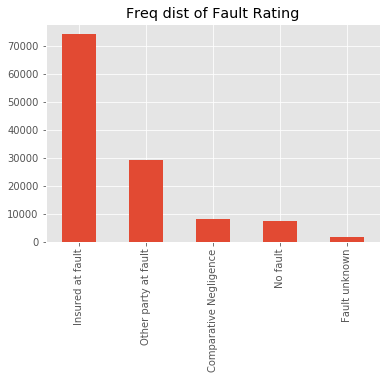

In [33]:
general_data['FaultRatingName'].value_counts().plot.bar(title="Freq dist of Fault Rating")